##  US Unemployment Data Forecasting using ARIMA

In [22]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [9]:
df = pd.read_csv("US_unemployment_rate_monthly.csv")
df

,Date,Unemployment Rate
0,1/1/10,9.8
1,2/1/10,9.8
2,3/1/10,9.9
3,4/1/10,9.9
4,5/1/10,9.6
...,...,...
118,11/1/19,3.5
119,12/1/19,3.5
120,1/1/20,3.6
121,2/1/20,3.5


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

df.index


DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

In [11]:
y = df['Unemployment Rate'].resample('MS').mean()

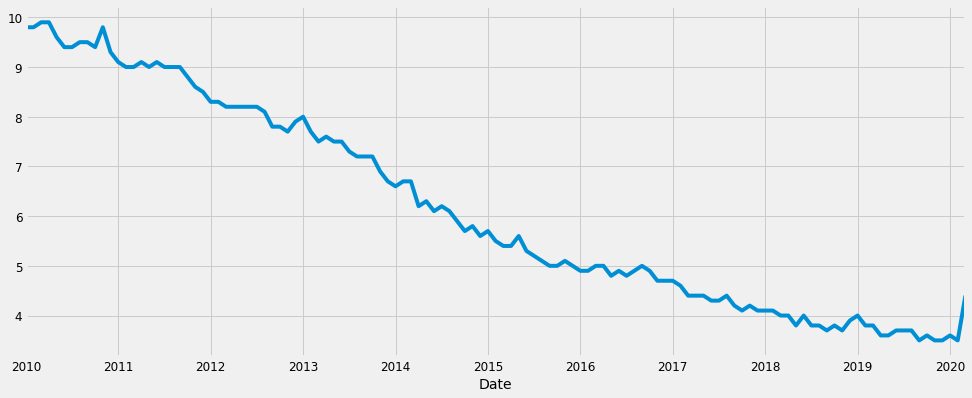

In [12]:
y.plot(figsize=(15, 6))
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:803.5407789859821
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:712.5564907326949
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:246.25629589803046
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:163.0301308111626
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:45.349168043499134
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:46.625127745821175
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:105.64390668566008
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:78.74699361142913
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:637.0945293899103
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:563.4826292364502
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:140.8110176801961
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:97.04780532266835
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-3.52864277696586
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:0.8107081022634137
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:64.32912441060516
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:34.717926128293925
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-84.01662324698306
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-83.63188252833774
AR

In [16]:
# ARIMA with (1,0,0,12) is chosen with the lowest AIC
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   Unemployment Rate   No. Observations:                  123
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  44.339
Date:                             Fri, 08 May 2020   AIC                            -80.678
Time:                                     13:30:06   BIC                            -69.912
Sample:                                 01-01-2010   HQIC                           -76.312
                                      - 03-01-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4314      0.815     -0.529      0.597      -2.029       1.167
ma.L1          0.3098      

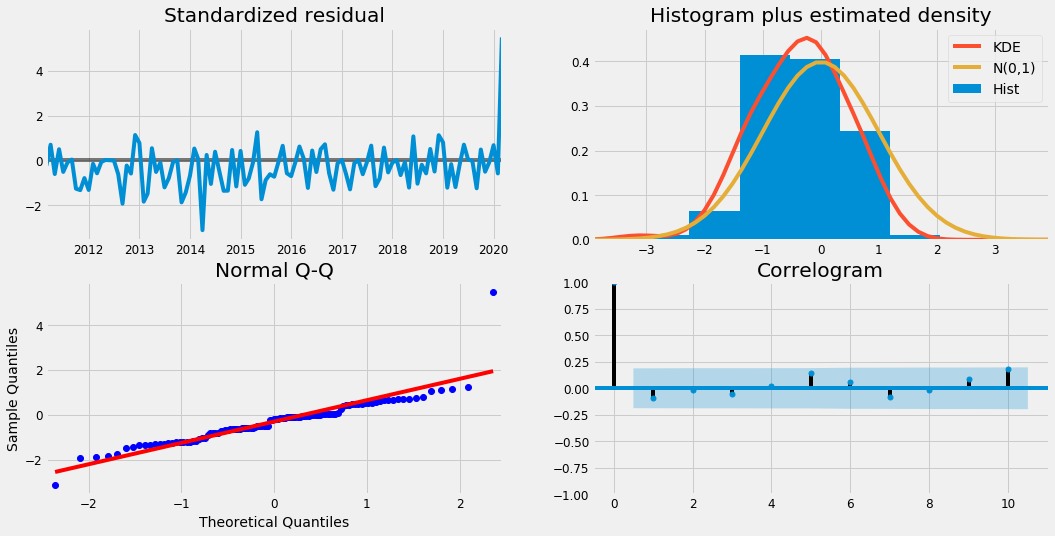

In [18]:
# Display diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

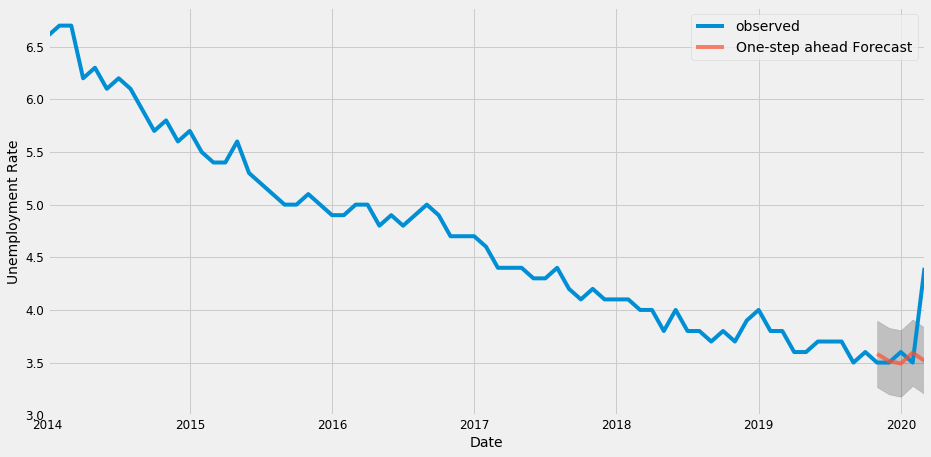

In [19]:
# Get the predictions
pred = results.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)

# Get the confidence interval
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
plt.legend()

plt.show()

In [24]:
# Forecasted values comparison
y_forecasted = pred.predicted_mean
y_truth = y['2019-11-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print("r2_score:" , r2_score(y_truth, y_forecasted))

forecast_errors = [y_truth[i]-y_forecasted[i] for i in range(len(y_truth))]

mean_forecast_error = np.mean(forecast_errors)
print('mean forecast Errors: %s' % mean_forecast_error)

bias = sum(forecast_errors) * 1.0/len(y_truth)
print('Bias: %f' % bias)

mse = mean_squared_error(y_forecasted, y_truth)
print('MSE: %f' % mse)

Mean Squared Error of our forecasts is 0.16
r2_score: -0.3050892680273074
mean forecast Errors: 0.16046971753675096
Bias: 0.160470
MSE: 0.161831


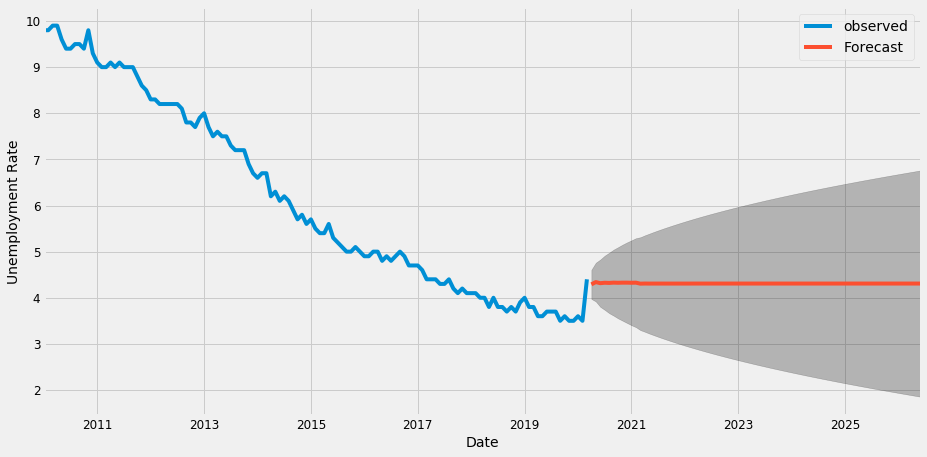

In [26]:
# Plot forecast values for next 75 steps
pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')

plt.legend()
plt.show()